In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


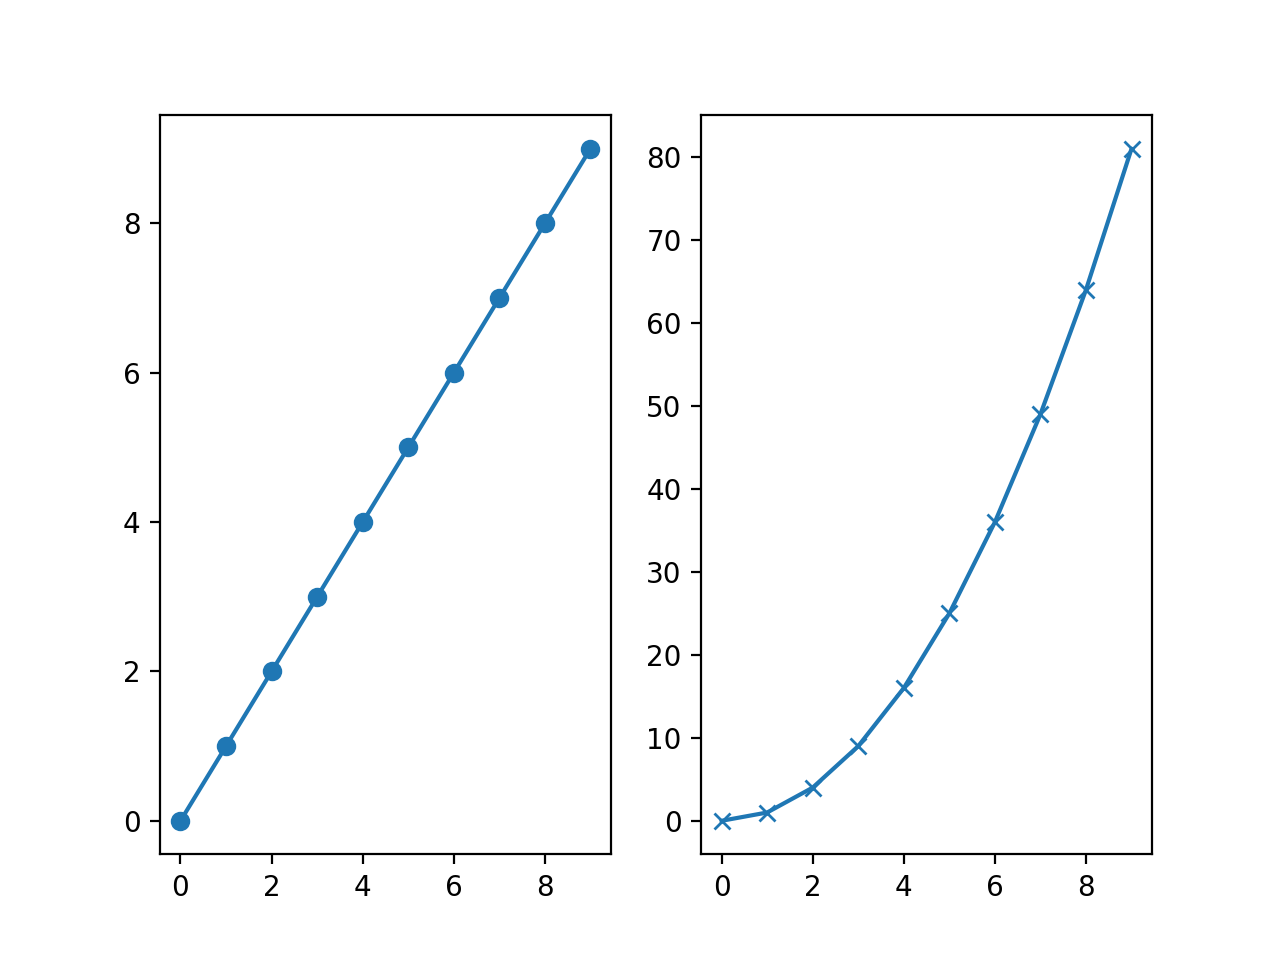

In [9]:
plt.figure()
plt.subplot(1, 2, 1)
linear_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.plot(linear_data, '-o')

In [10]:
plt.subplot(1, 2, 2)
exponential_data = linear_data ** 2
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


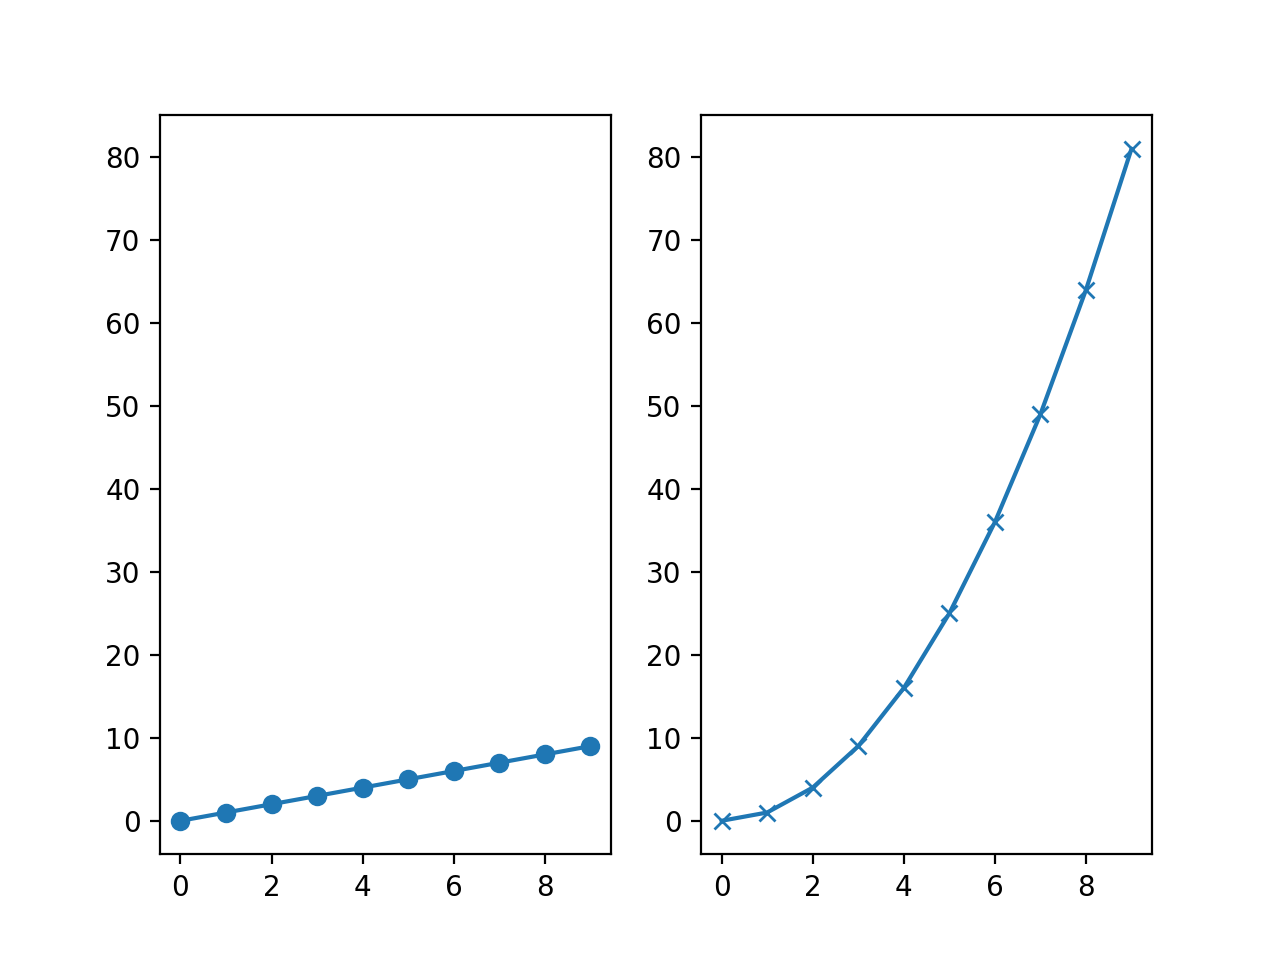

In [13]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(1, 2, 2, sharey = ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


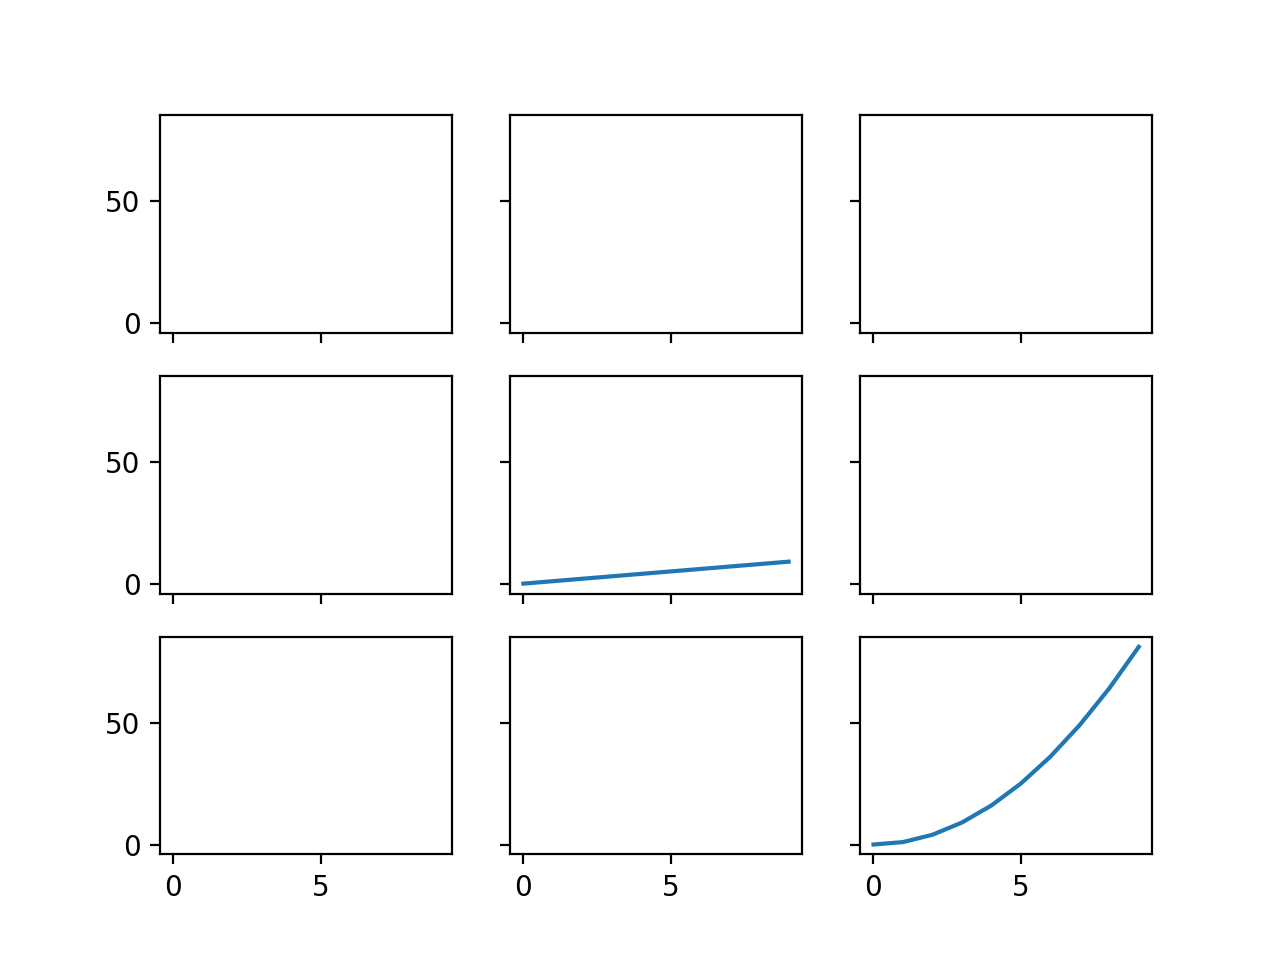

In [16]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, 
                                                                       sharex = True,
                                                                       sharey = True)
ax5.plot(linear_data)
ax9.plot(exponential_data)

# Histograms

<IPython.core.display.Javascript object>


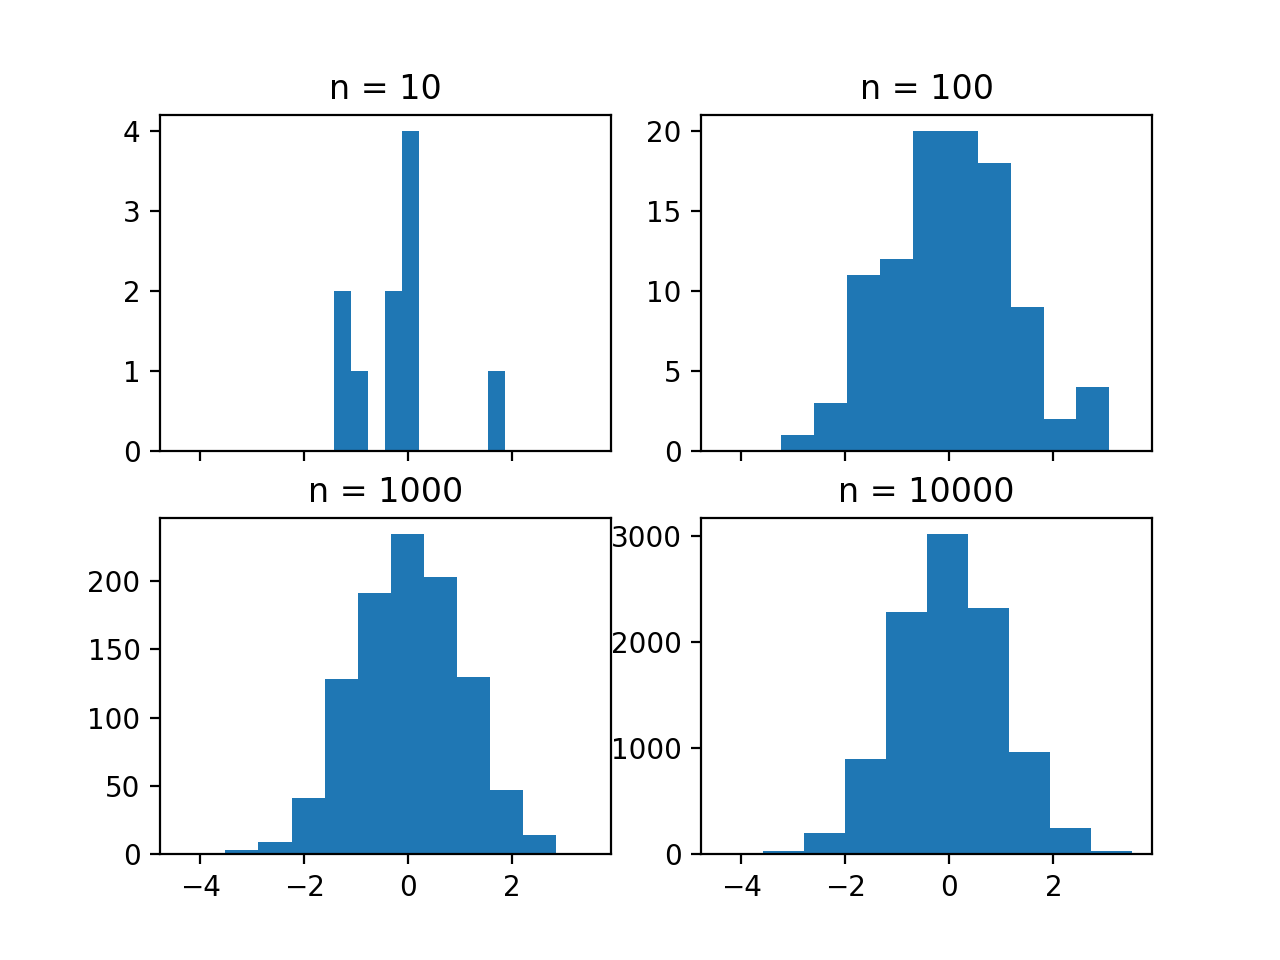

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10 ** (n+1)
    sample = np.random.normal(loc = 0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n = {}'.format(sample_size))

<IPython.core.display.Javascript object>


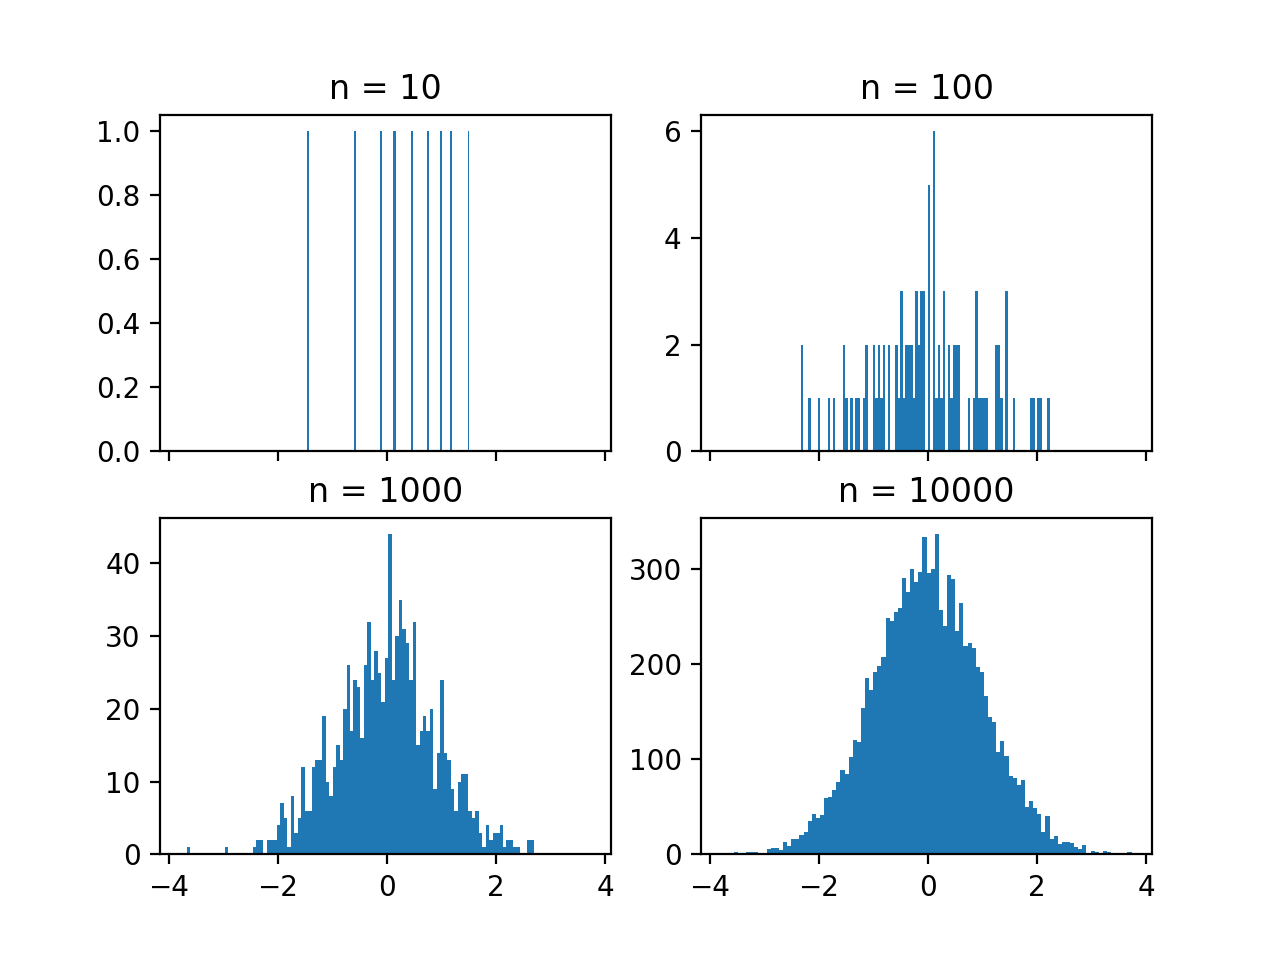

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10 ** (n+1)
    sample = np.random.normal(loc = 0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample, bins = 100)
    axs[n].set_title('n = {}'.format(sample_size))

<IPython.core.display.Javascript object>


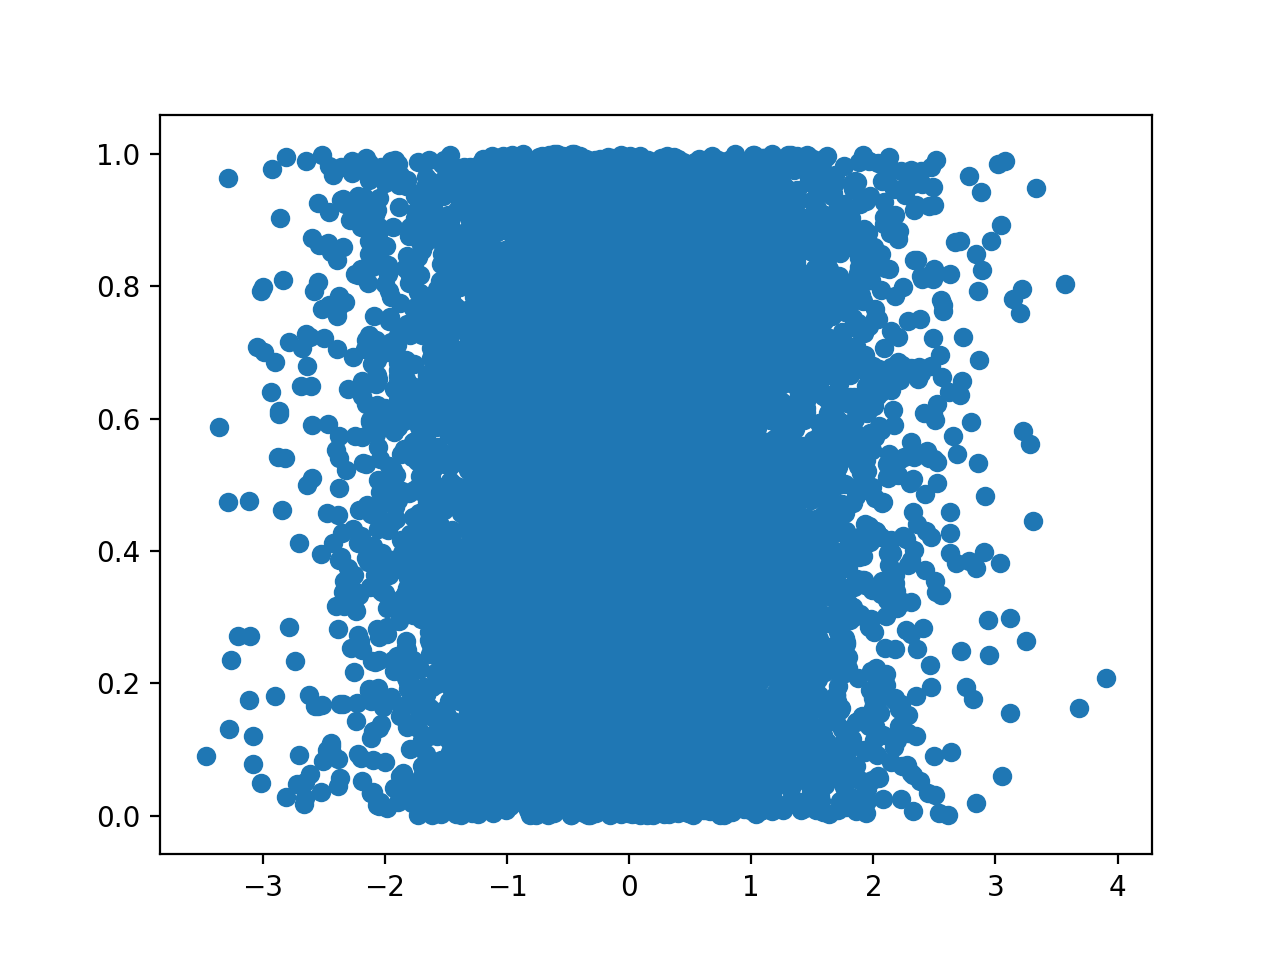

In [25]:
plt.figure()
X = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
Y = np.random.random(size = 10000)
plt.scatter(X, Y)

<IPython.core.display.Javascript object>


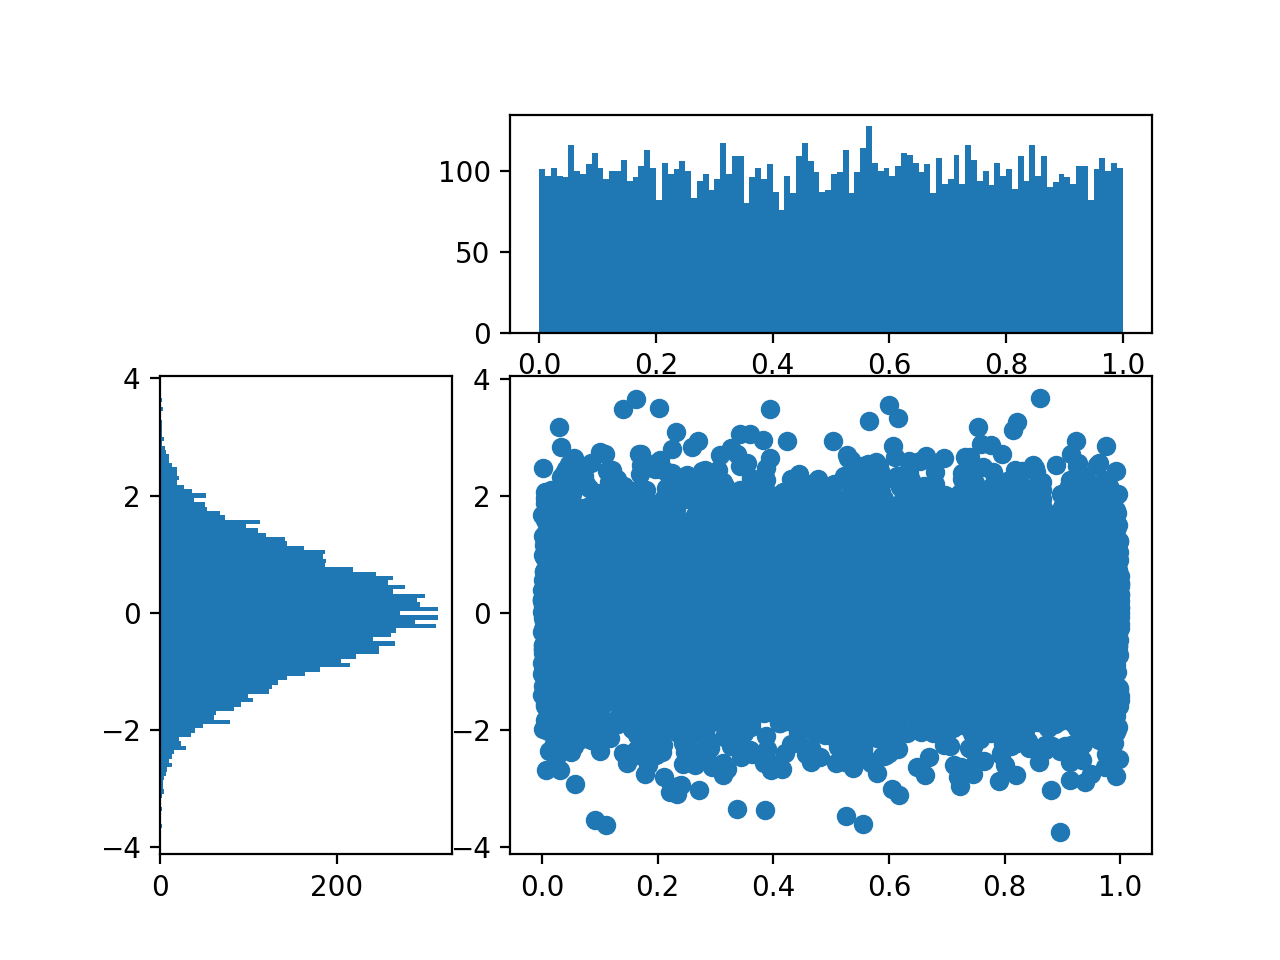

In [26]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [35]:
top_histogram.clear()
lower_right.clear()
side_histogram.clear()

Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
top_histogram.hist(X, bins = 100)
lower_right.scatter(X, Y)
s = side_histogram.hist(Y, bins = 100, orientation = 'horizontal')

# Box-Plot

In [36]:
import pandas as pd

normal_sample = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
random_sample = np.random.random(size = 10000)
gamma_sample = np.random.gamma(2, size = 10000)

df = pd.DataFrame({'normal': normal_sample, 
       'random': random_sample, 
       'gamma': gamma_sample})

In [37]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.015181,0.505441,2.011729
std,0.997514,0.288922,1.428215
min,-3.930484,0.000010,0.017536
25%,-0.692958,0.254673,0.959095
50%,-0.009559,0.509020,1.675431
75%,0.647843,0.757177,2.715297
max,3.328428,0.999877,14.218861


<IPython.core.display.Javascript object>


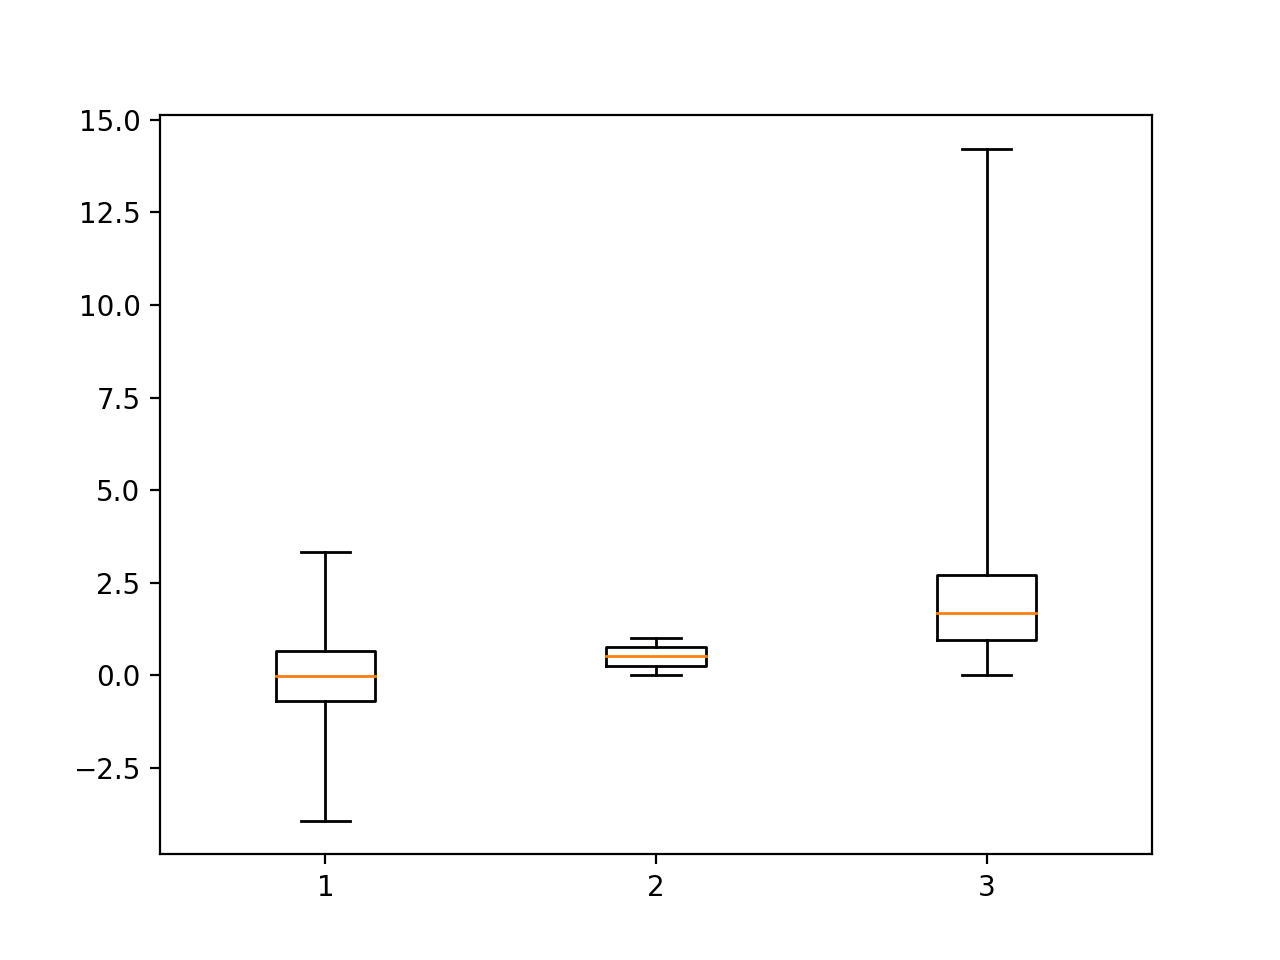

In [38]:
plt.figure()
_ = plt.boxplot(df['normal'], whis = 'range')

In [39]:
plt.clf()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis = 'range')

<IPython.core.display.Javascript object>


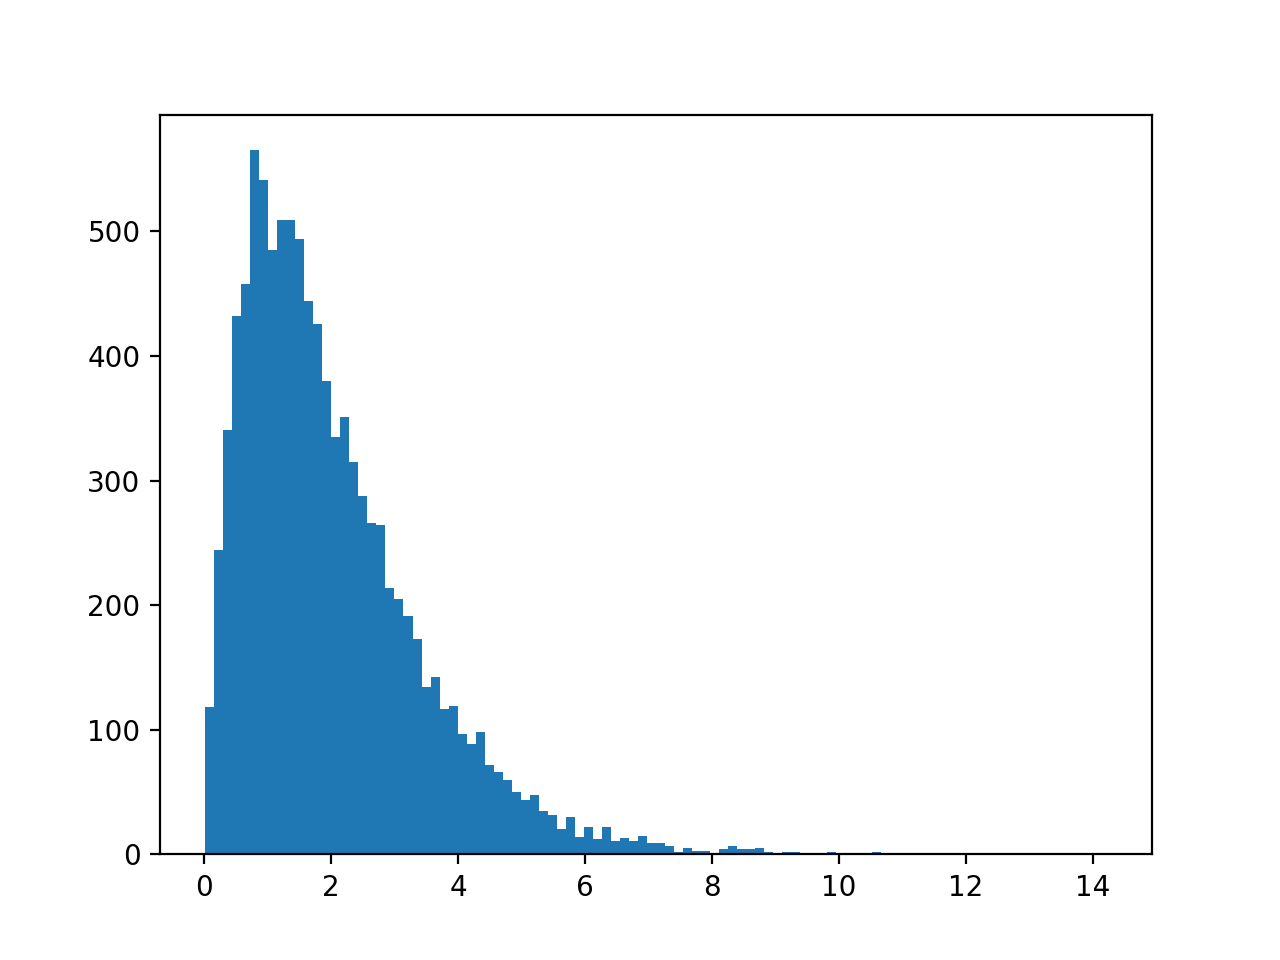

In [40]:
plt.figure()
_ = plt.hist(df['gamma'], bins = 100)

<IPython.core.display.Javascript object>


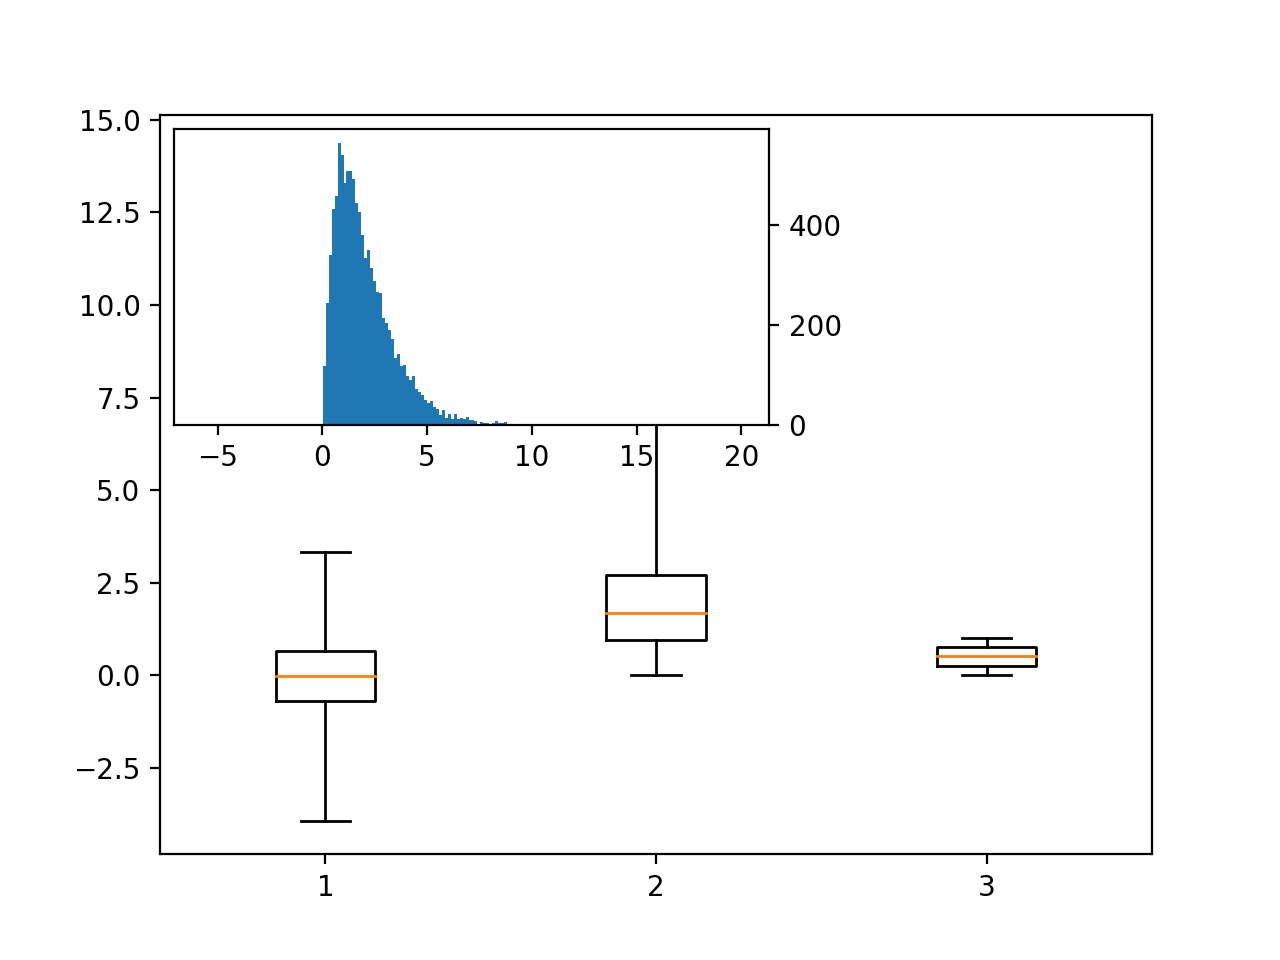

In [42]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([df['normal'], df['gamma'], df['random']], whis = 'range')
ax2 = mpl_il.inset_axes(plt.gca(), width = '60%', height = '40%', loc = 2)
ax2.hist(df['gamma'], bins = 100)
ax2.margins(x = 0.5)

In [45]:
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


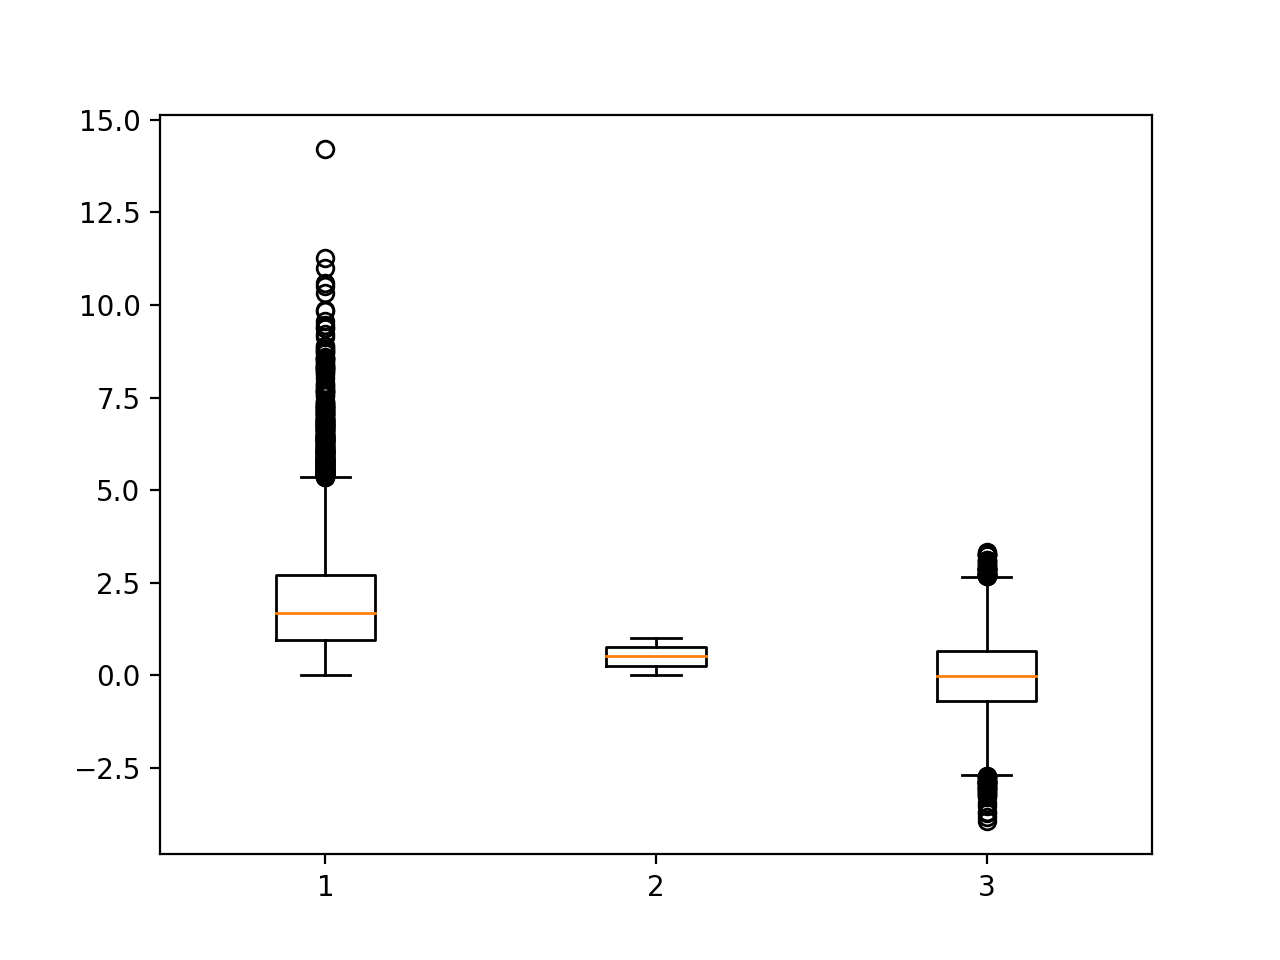

In [46]:
plt.figure()
_ = plt.boxplot([df['gamma'], df['random'], df['normal']])

# Heatmaps

<IPython.core.display.Javascript object>


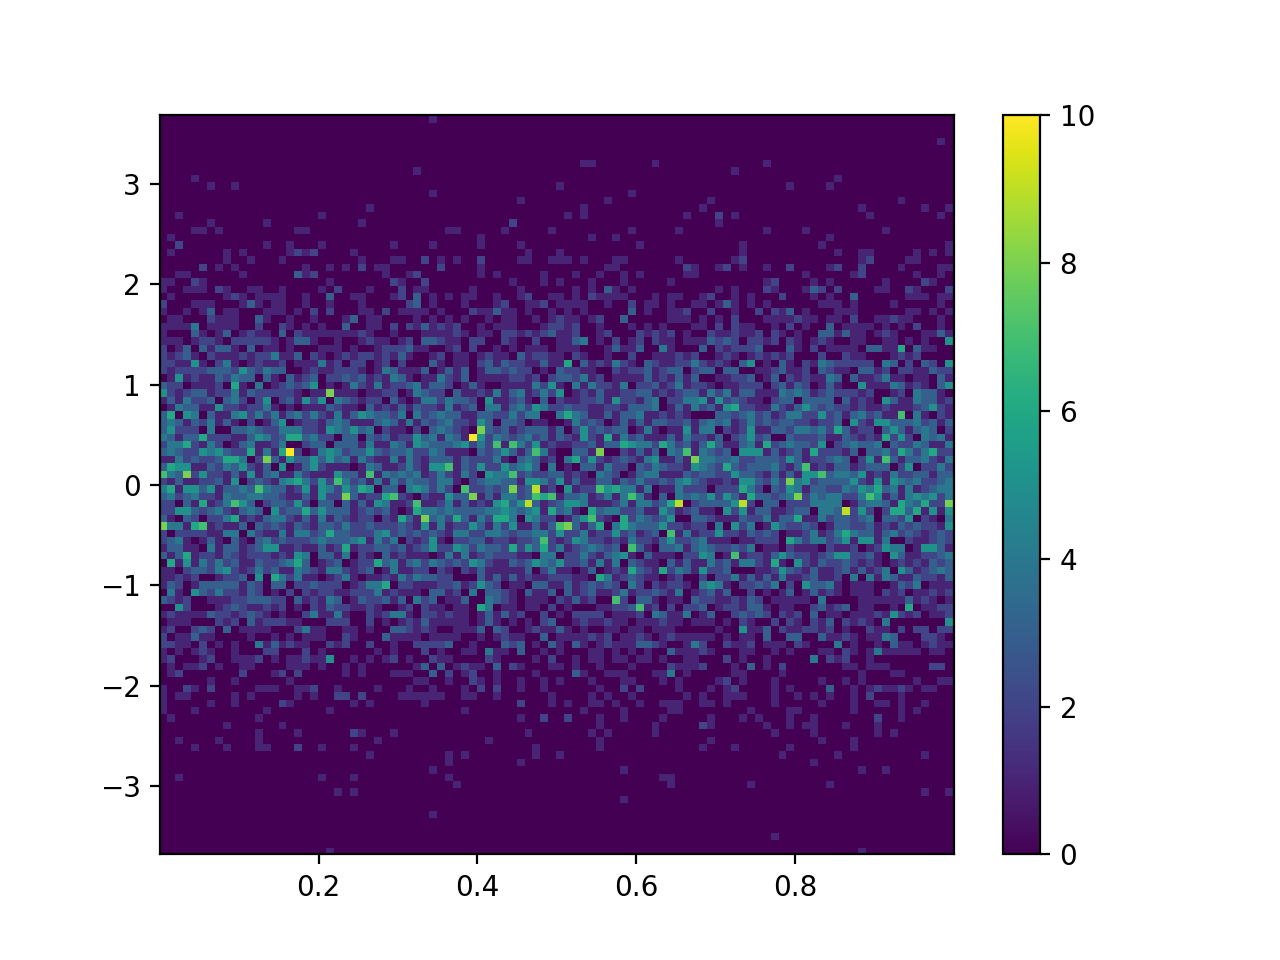

In [50]:
plt.figure()
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
_ = plt.hist2d(X, Y, bins = 25)

In [51]:
_ = plt.hist2d(X, Y, bins = 100)

In [52]:
plt.colorbar()

# Animations

In [63]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [66]:
def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins = bins)
    plt.axis([-4, 4, 0, 30])
    plt.gca().set_title('Sampling Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3, 27])

<IPython.core.display.Javascript object>


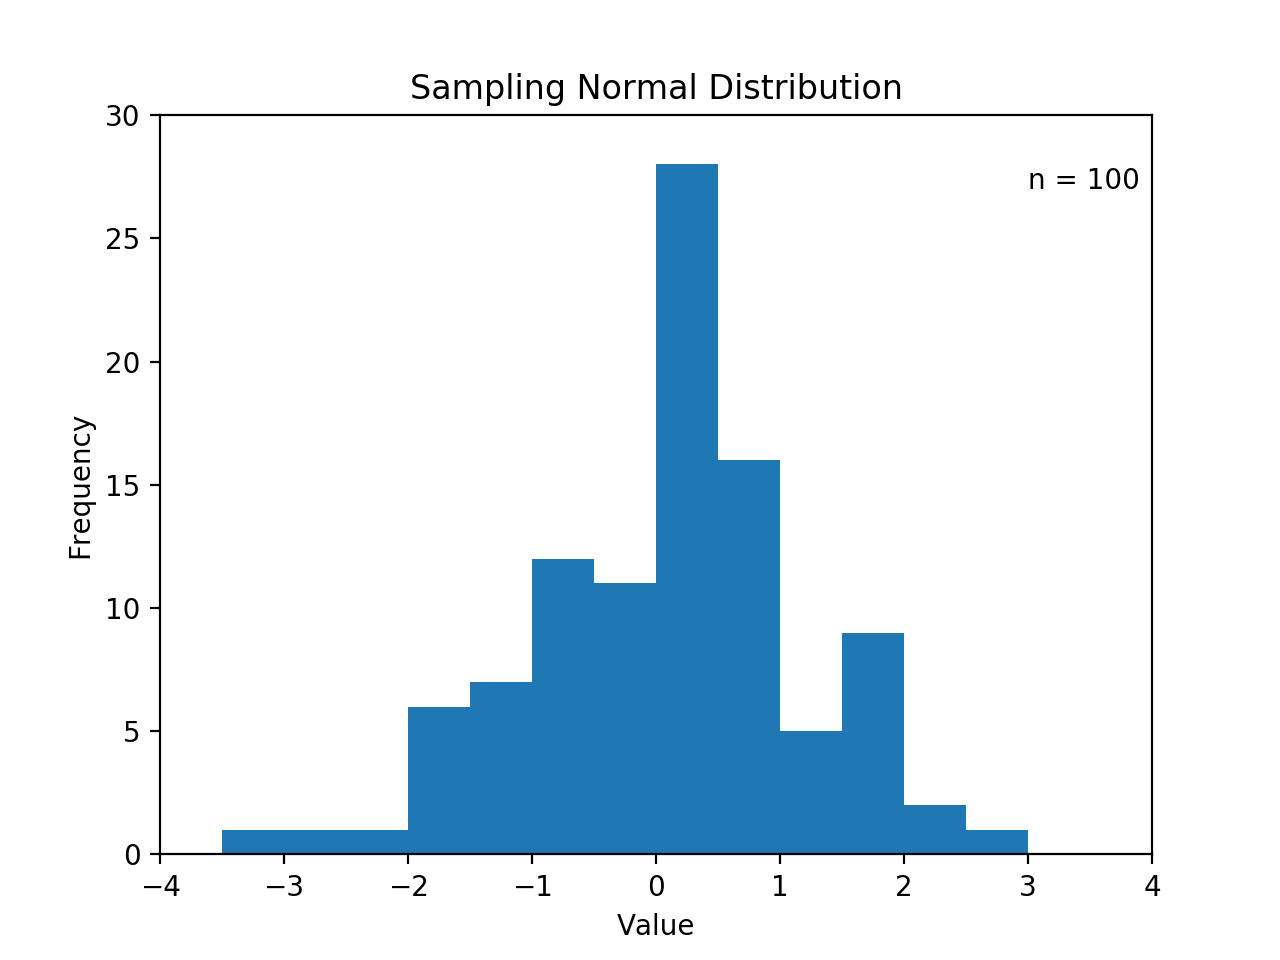

In [67]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval = 100)

# Interactivity

<IPython.core.display.Javascript object>


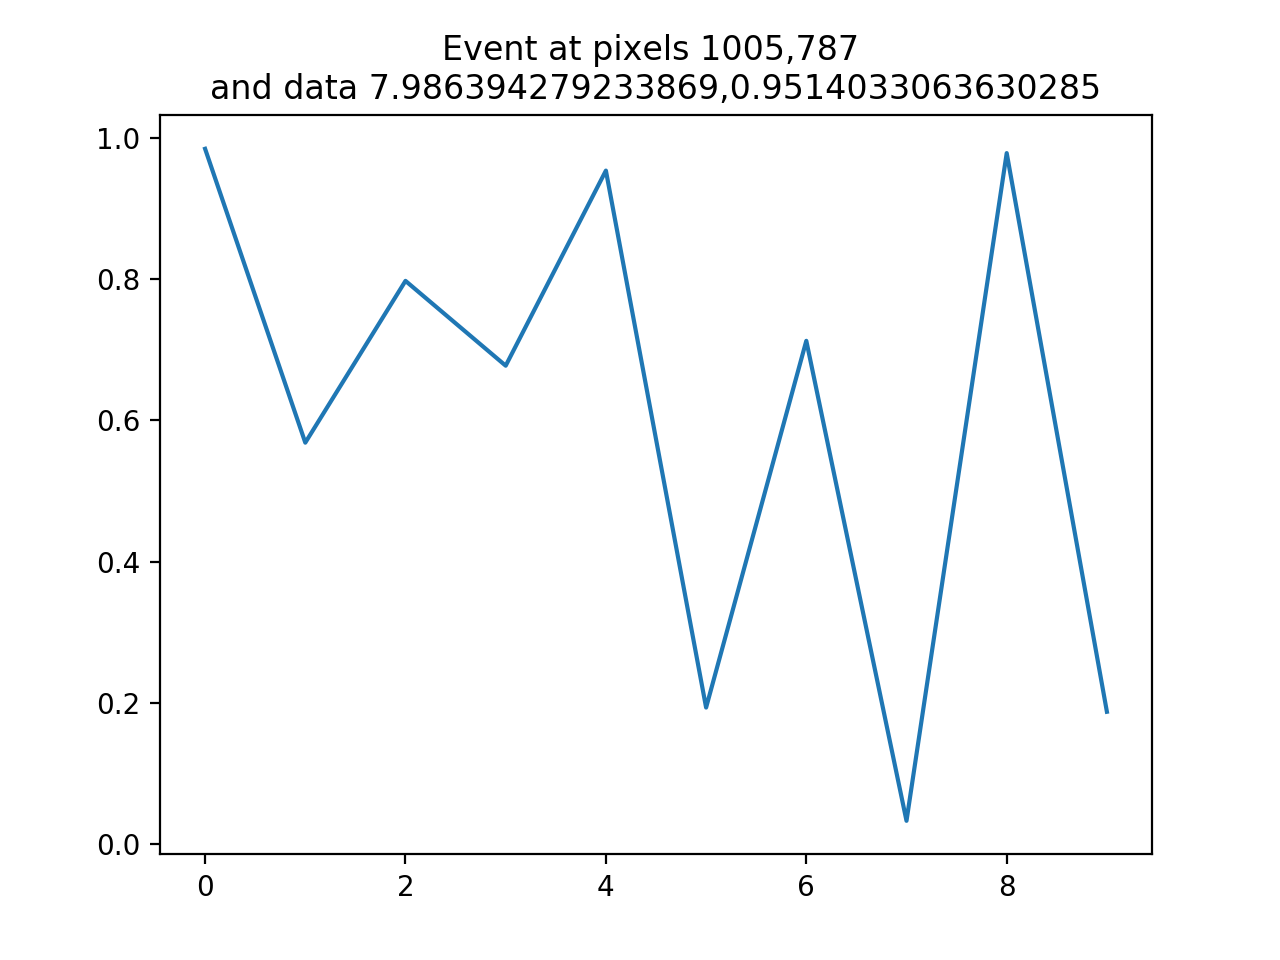

7

In [68]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

# Plotting using Pandas

In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [4]:
plt.style.use('seaborn-colorblind')

In [5]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))

In [6]:
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


<IPython.core.display.Javascript object>


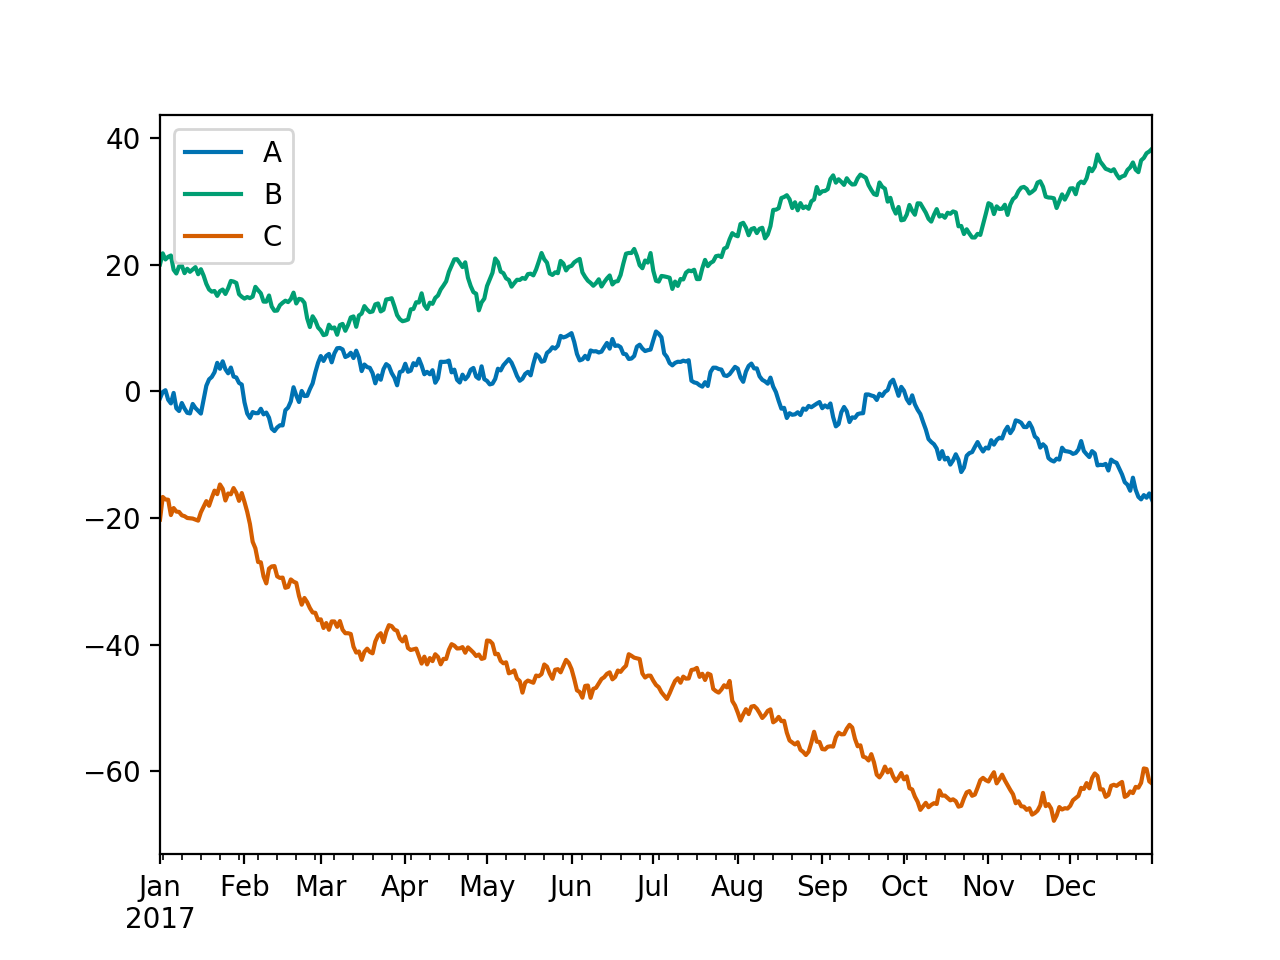

In [9]:
df.plot();

<IPython.core.display.Javascript object>


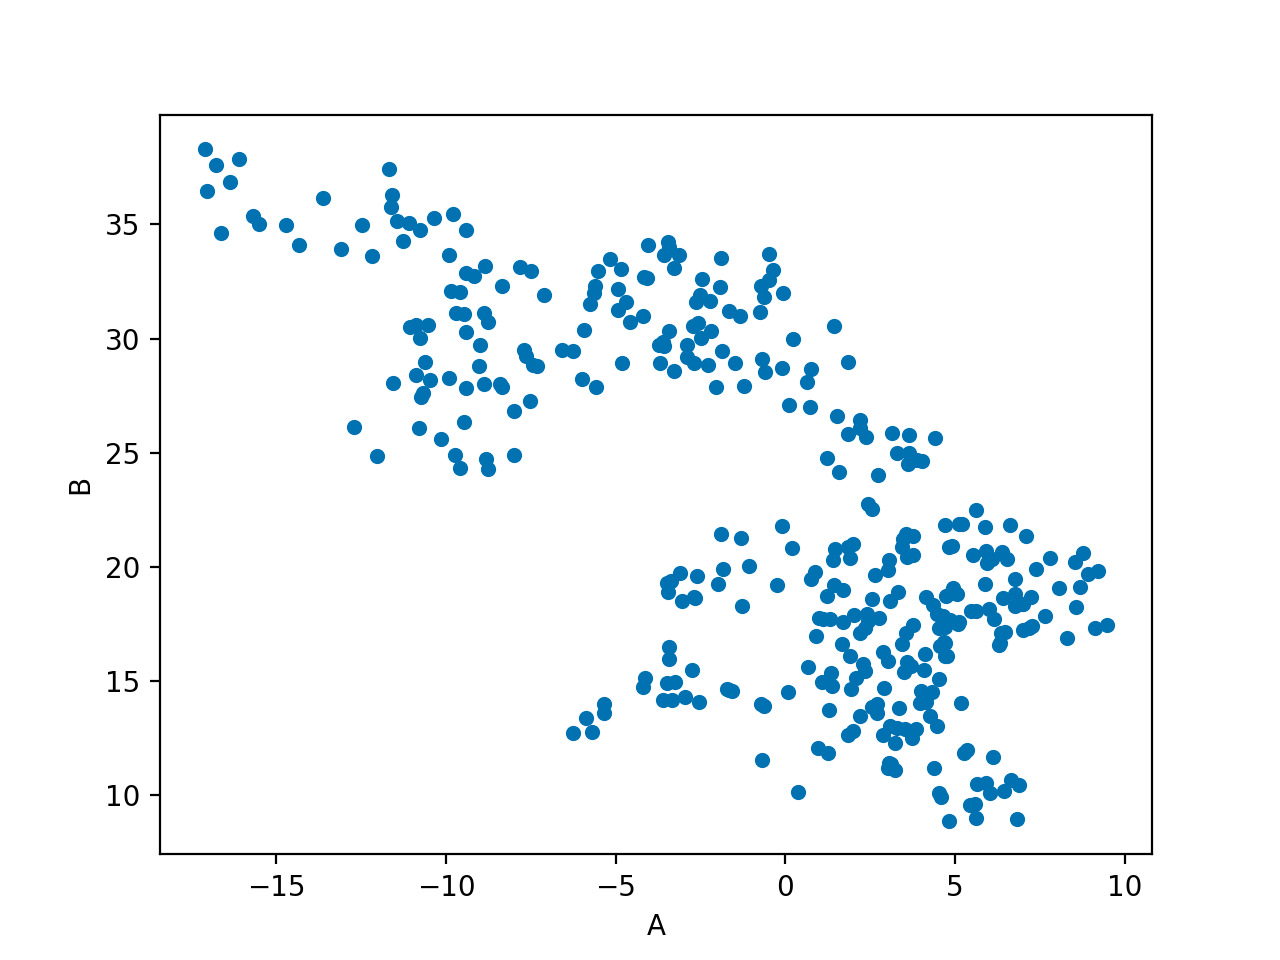

In [10]:
df.plot('A', 'B', kind = 'scatter');

<IPython.core.display.Javascript object>


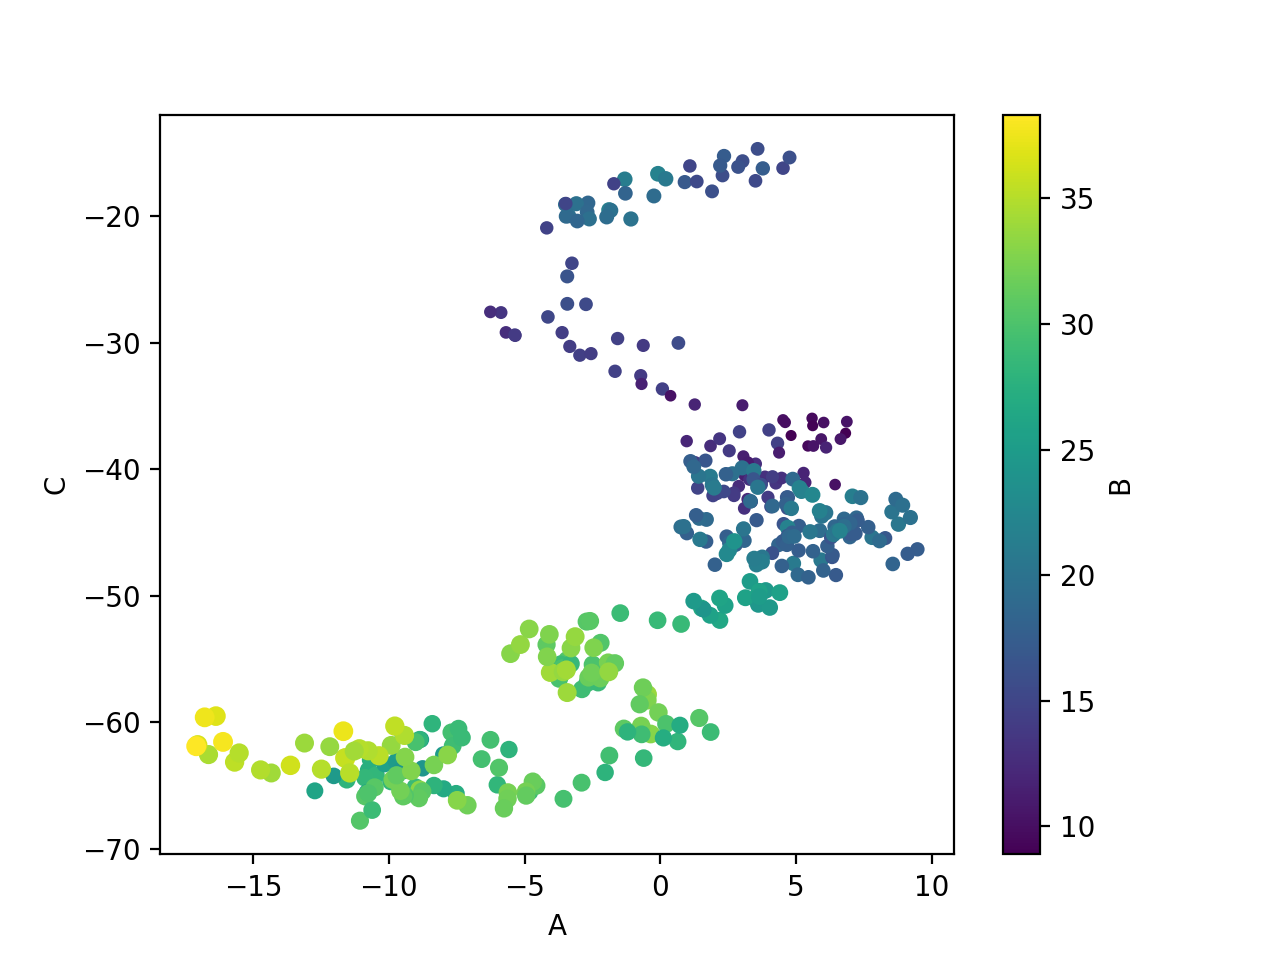

In [11]:
df.plot.scatter('A', 'C', c = 'B', s = df['B'], colormap = 'viridis');

<IPython.core.display.Javascript object>


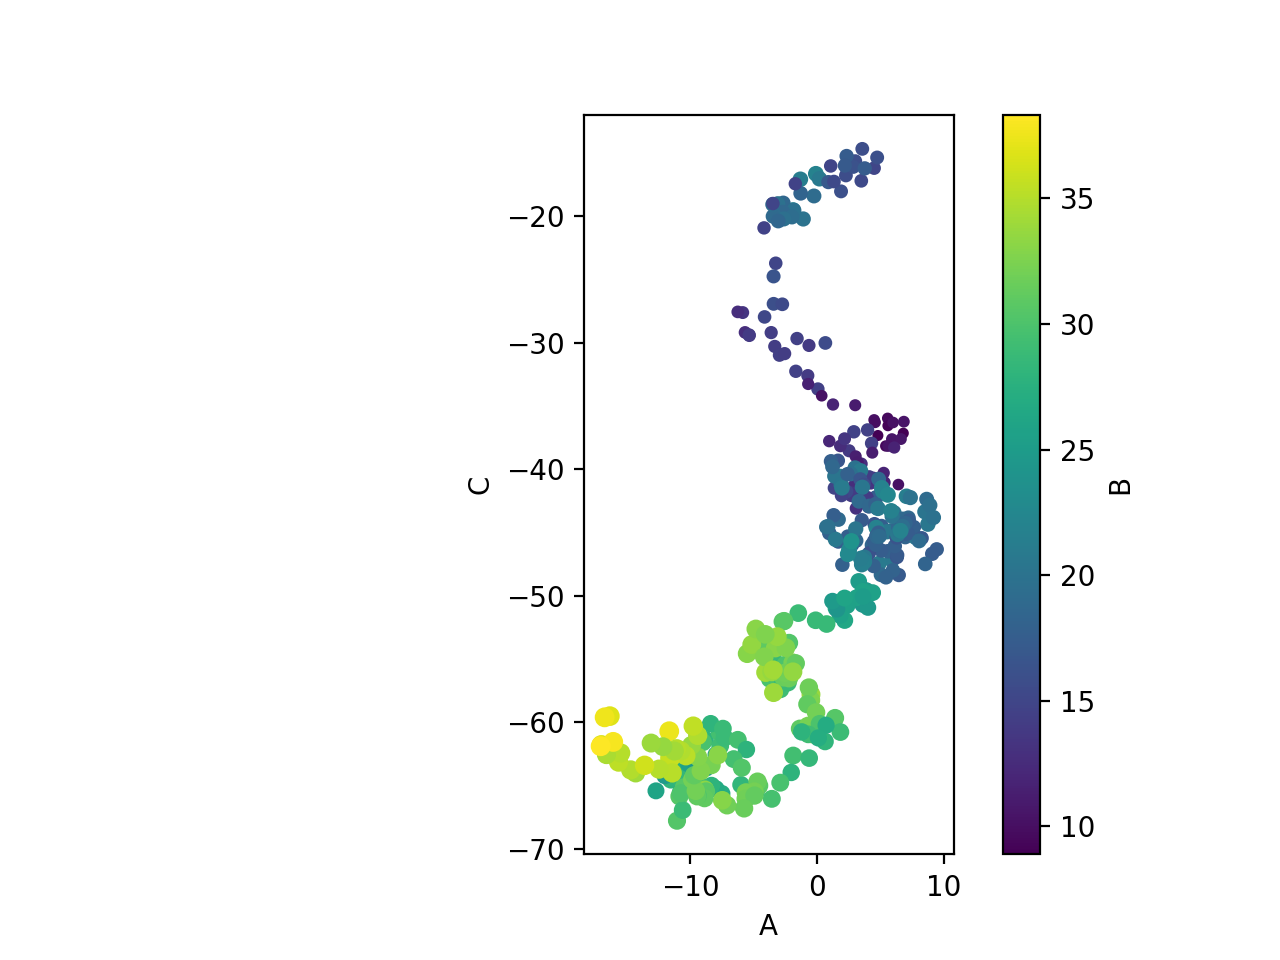

In [12]:
ax = df.plot.scatter('A', 'C', c = 'B', s = df['B'], colormap = 'viridis')
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


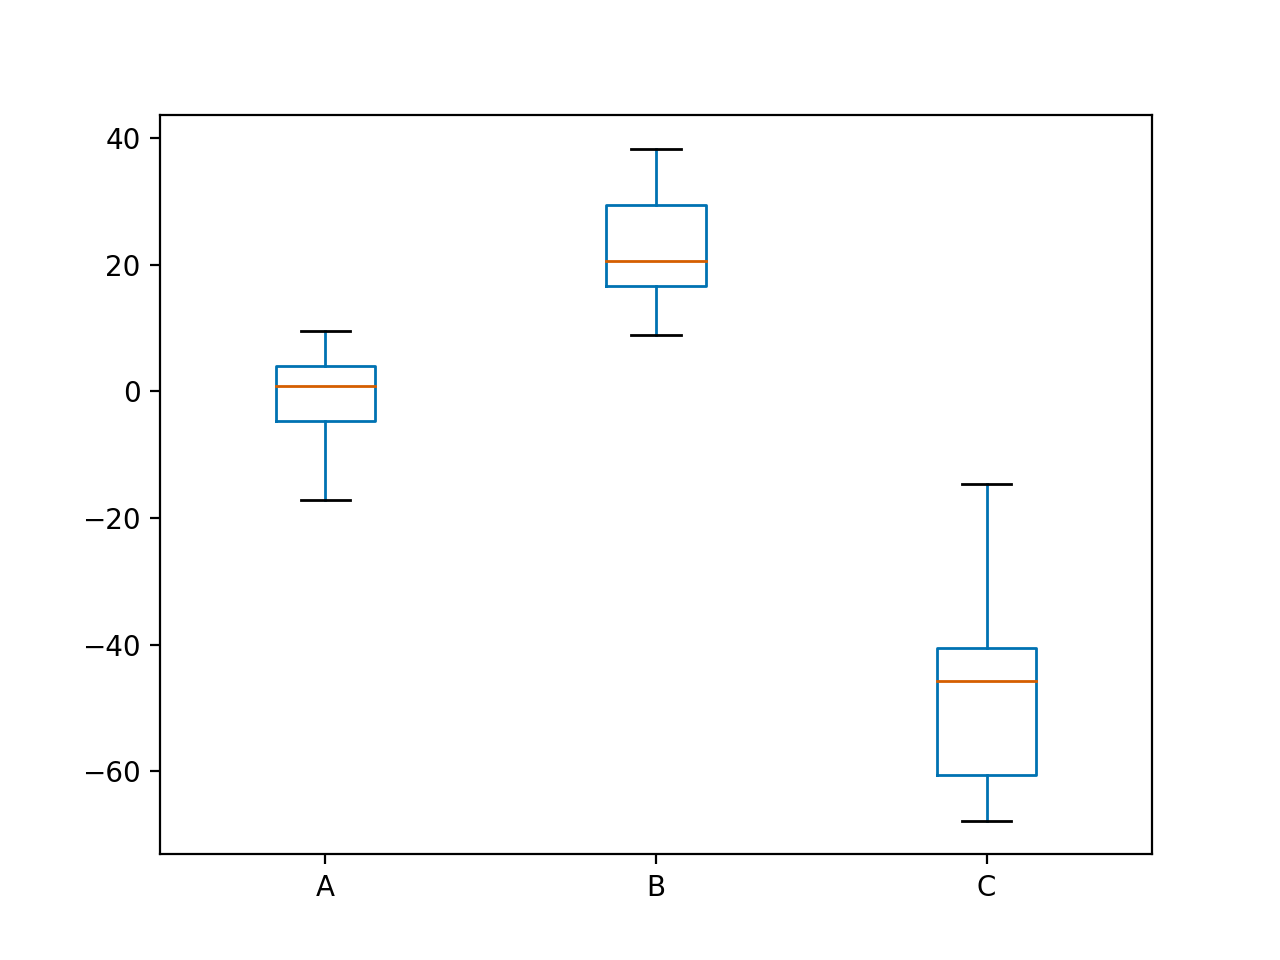

In [15]:
df.plot.box();

<IPython.core.display.Javascript object>


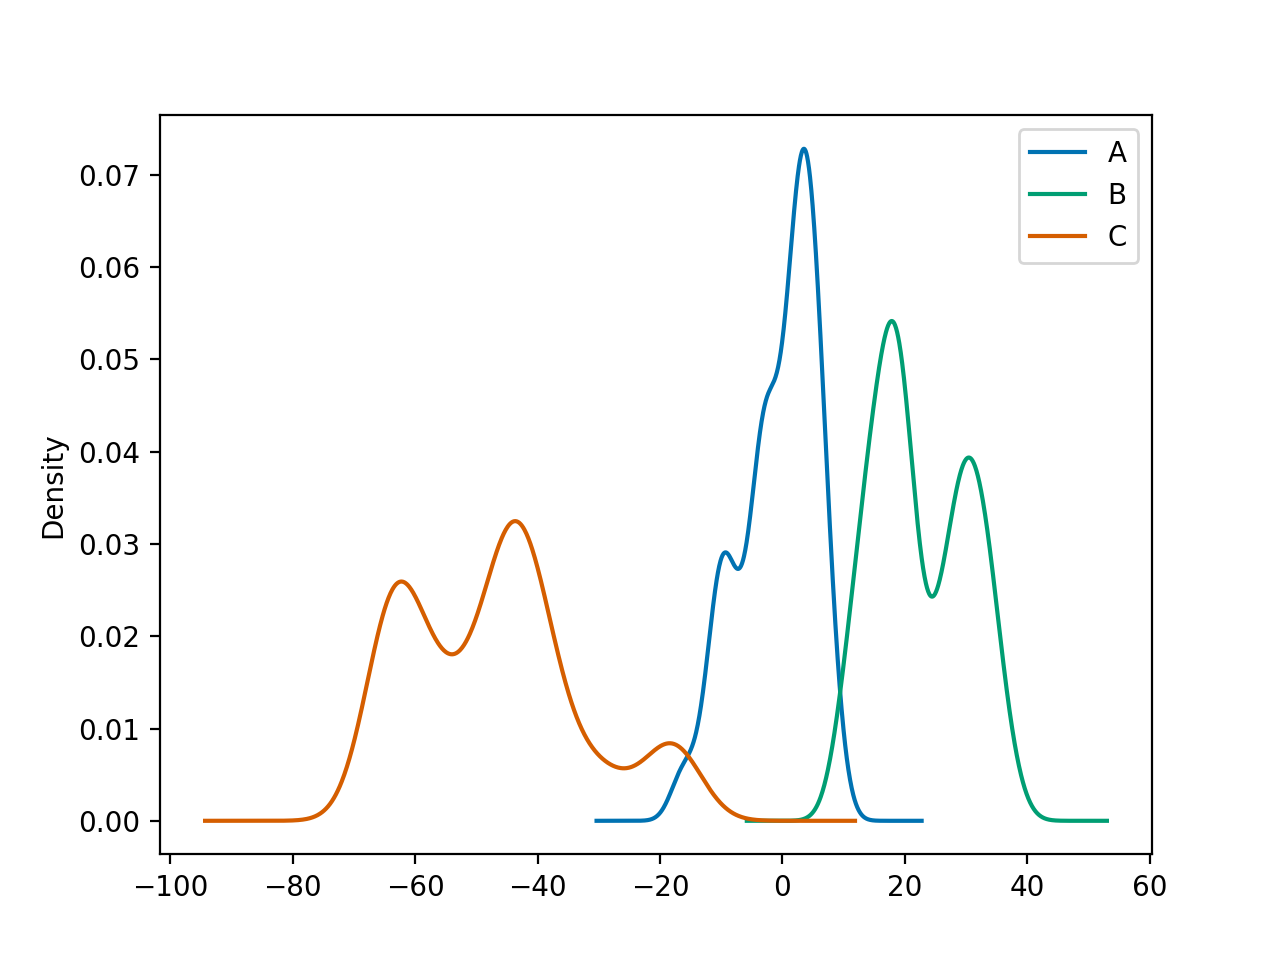

In [17]:
df.plot.kde();

<IPython.core.display.Javascript object>


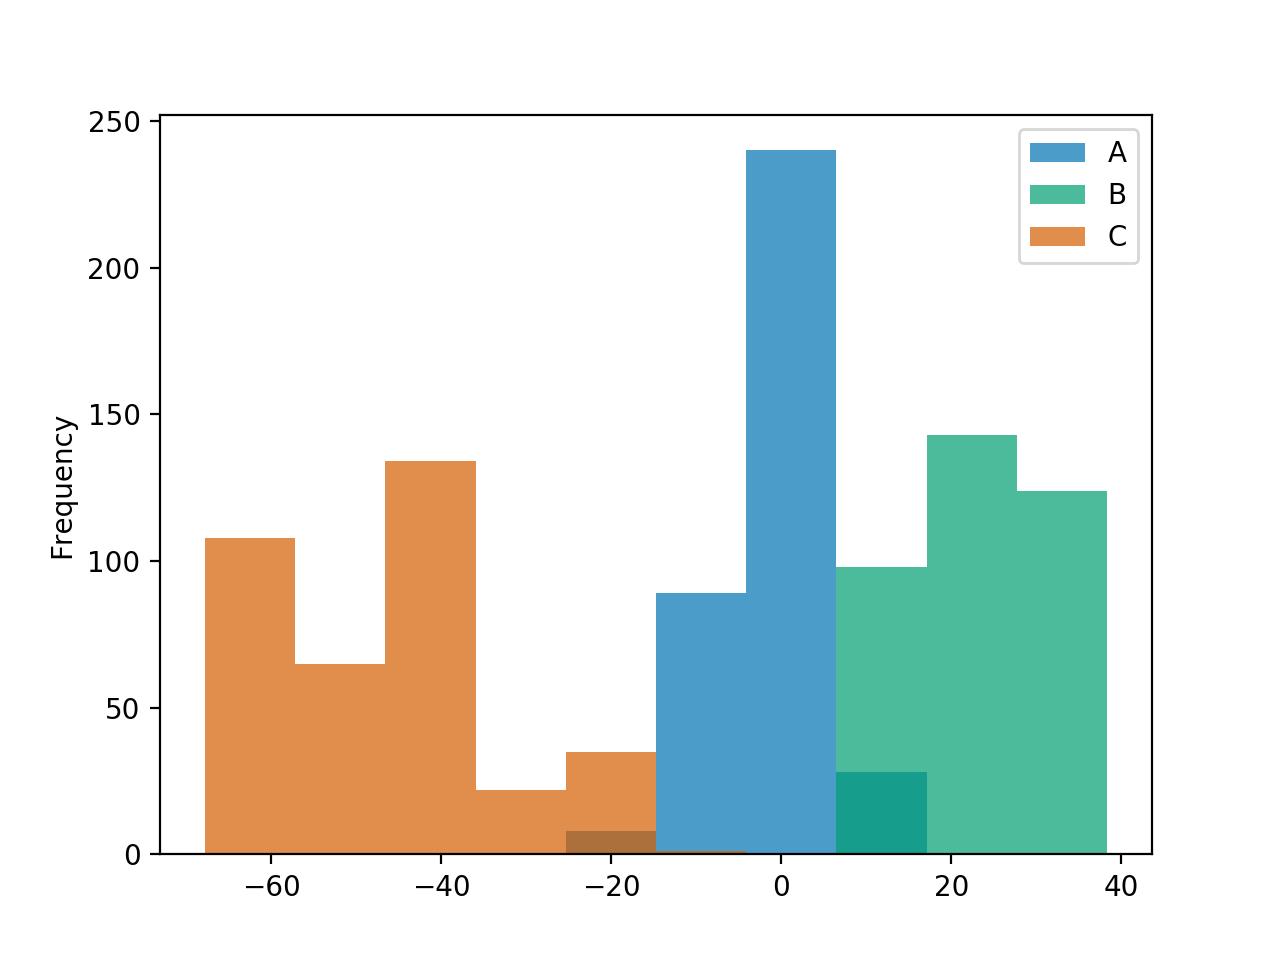

In [18]:
df.plot.hist(alpha = 0.7);

# Seaborn

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [20]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

<IPython.core.display.Javascript object>


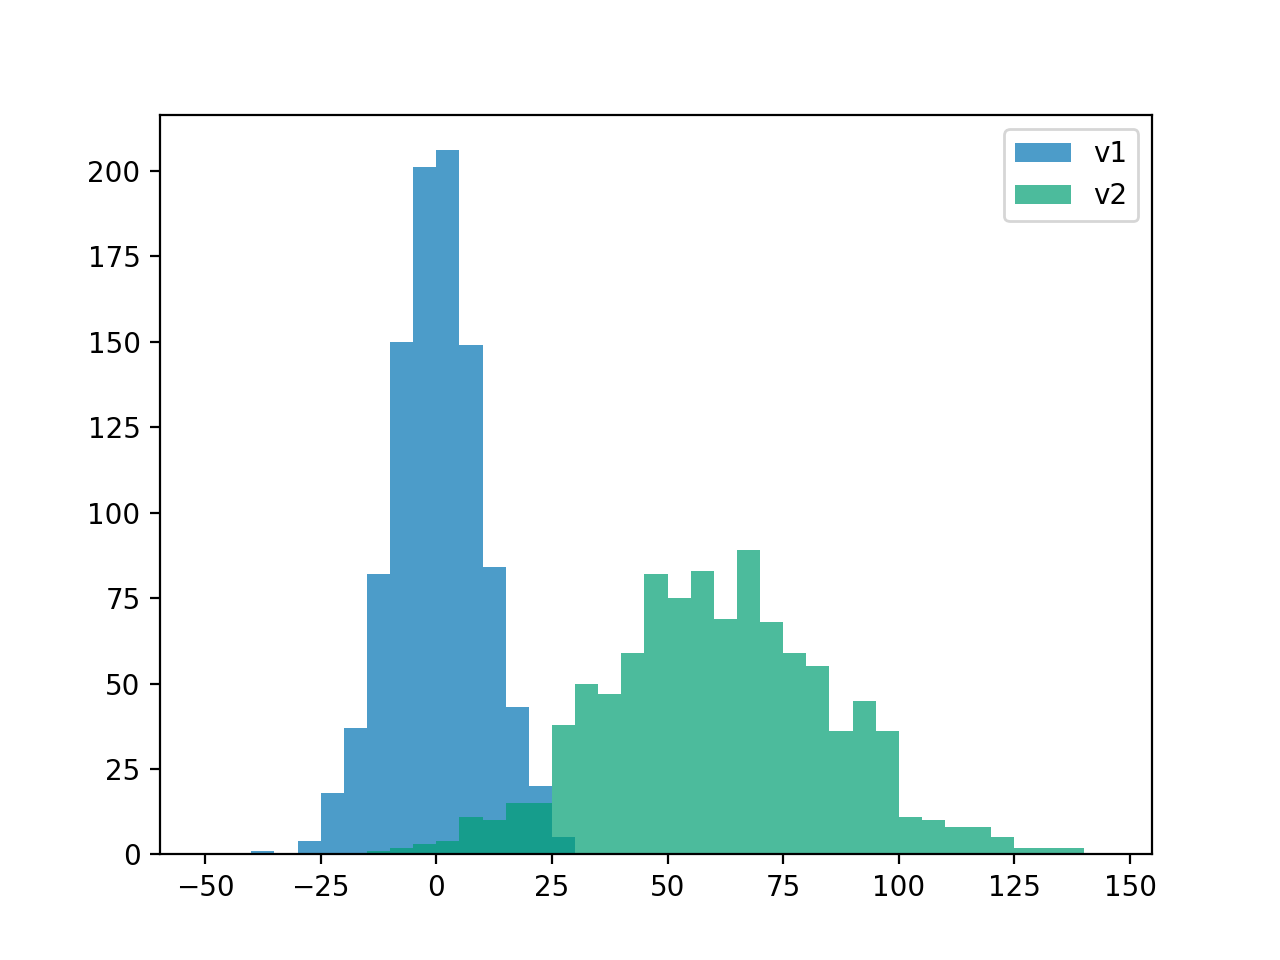

In [21]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

<IPython.core.display.Javascript object>


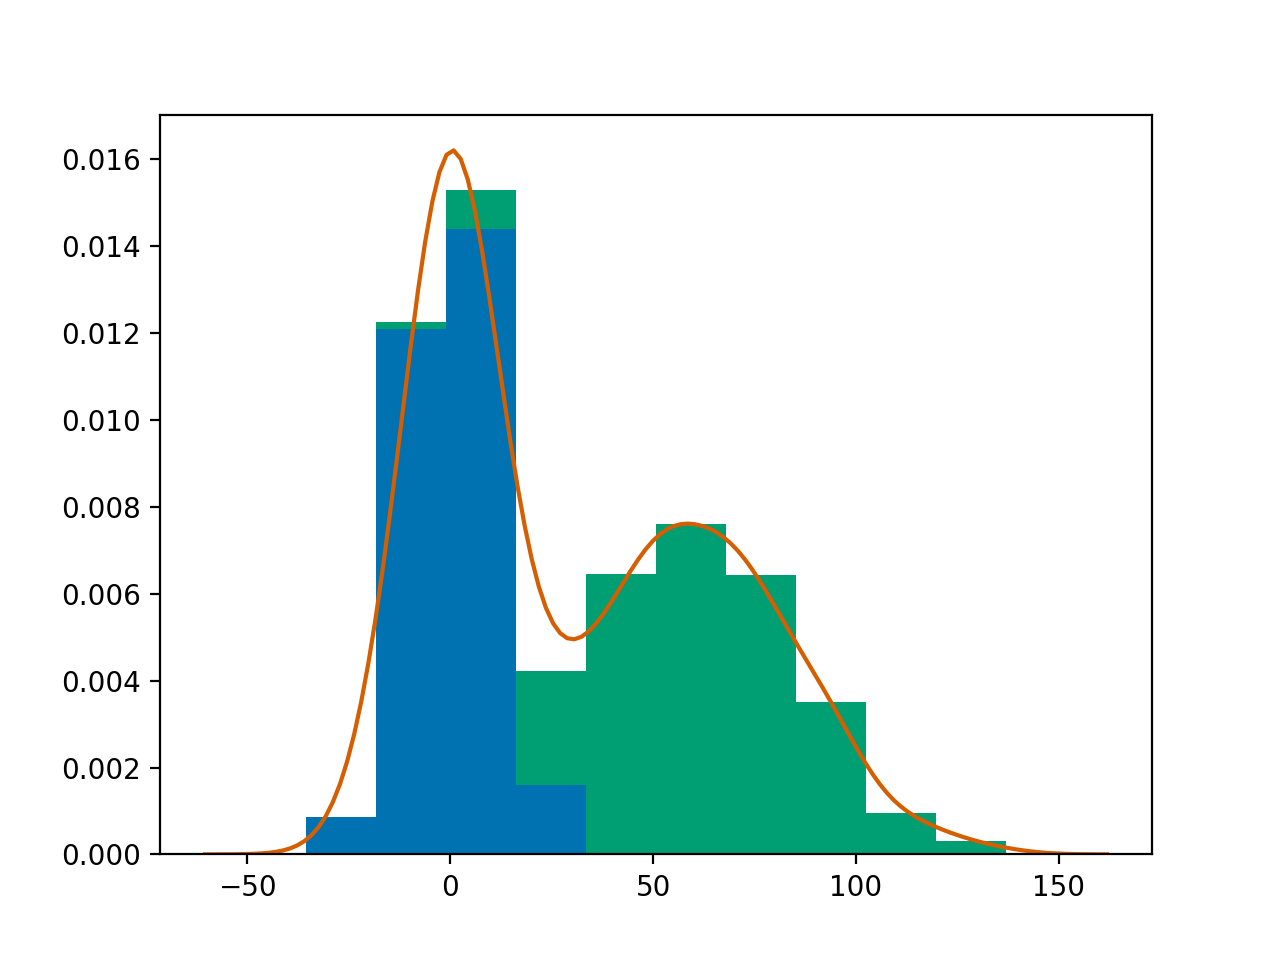

/Users/amoddhopavkar/Conda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


In [22]:
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);